# Dane

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from scipy.linalg import norm




def relu(x):
    #print(x)
    res = np.where(x > 10**5, 10**5, x * (x > 0))
    return res

def relu_derivative(x):
    res = 1. * (x > 0)
    if np.isnan(res).any():
        raise ValueError('NaN value in relu_derivative')
    return res 

def sigmoid(x):
    res = 1.0 / (1.0 + np.exp(-x))
    return res if not np.isnan(res).any() else 1

def sigmoid_derivative(x):
    sx = sigmoid(x)
    res = sx * (1.0 - sx)
    if np.isnan(res).any():
        raise ValueError('NaN value in sigmoid_derivative')
    return res 

def tanh(x):
    res = np.tanh(x)
    if np.isnan(res).any():
        raise ValueError('NaN value in tanh')
    return res 

def tanh_derivative(x):
    tx = tanh(x)
    res = 1 - tx**2
    if np.isnan(res).any():
        raise ValueError('NaN value in tanh_derivative')
    return res 

def identity(x):
    return x

def identity_derivative(x):
    return 1

class NeuralNetwork_1_5_1:

    #Inicjalizacja sieci
    def __init__(self, x, y, seed, eta):
        np.random.seed(seed)
        self.input = x.T
        # Wagi z 1 wejscia do warstwy ukrytej z 5 neuronami
        self.weights1 = np.random.rand(self.input.shape[0],5).T  - 0.5 #* np.sqrt(1. / self.input.shape[0])
        #print(self.weights1)
        # Wagi z warstwy ukrytej do warstwy wyjsciowej
        self.weights2 = np.random.rand(5,1).T  -0.5 #* np.sqrt(1. / 5)
        #print(self.weights2)
        # Wartosci wyjsciowe        
        self.y = (y / norm(y)).T
        self.output = np.zeros(self.y.shape)
        #print(self.y.shape)
        #print(self.output)
        self.eta = eta

    #Feedforward z funkcjami aktywacji jako argumenty dla tworzenia kombinacji
    def feedforward(self, f1, f2):
        self.layer1 = f1(np.dot(self.weights1, self.input))
        self.output = f2(np.dot(self.weights2, self.layer1))

    #Propagacja wsteczna z funkcjami aktywacji jako argumenty dla tworzenia kombinacji
    def backprop(self, df1, df2):
        # Blad dla warstwy wyjsciowej
        delta_2 = (self.y - self.output) * df2(self.output)
        d_weights2 = self.eta * np.dot(delta_2, self.layer1.T)
        # Blad dla warstwy ukrytej
        delta_1 = df1(self.layer1) * np.dot(self.weights2.T, delta_2)
        d_weights1 = self.eta * np.dot(delta_1, self.input.T)
        # Aktualizacja wag
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    
    def update(self, e):
        self.feedforward(self.f1, self.f2)
        self.backprop(self.df1, self.df2)
        self.ax.clear()
        self.ax.scatter(self.input.flatten(), self.output.flatten(), color='blue')
        self.ax.set_title('Aproksymowana przez sieć neuronową 1-5-1 ({} punktów)'.format(len(self.input.flatten())))
        self.ax.text(0.5, 0.01, 'Krok: {}'.format(e), ha='center', va='center', transform=self.ax.transAxes)
        
    # Algorytm propagacji wstecznej wykonujacy sie przez kreslona liczbe epok
    def train(self, f1_type, f2_type, epochs):
        f1 = relu
        df1 = relu_derivative
        f2 = relu
        df2 = relu_derivative

        if f1_type == 'sigmoid':
            f1 = sigmoid
            df1 = sigmoid_derivative
        elif f1_type == 'tanh':
            f1 = tanh
            df1 = tanh_derivative
        elif f1_type == 'identity':
            f1 = identity
            df1 = identity_derivative
        if f2_type == 'sigmoid':
            f2 = sigmoid
            df2 = sigmoid_derivative
        elif f2_type == 'tanh':
            f2 = tanh
            df2 = tanh_derivative
        elif f2_type == 'identity':
            f2 = identity
            df2 = identity_derivative


        for e in range(epochs):
            self.feedforward(f1, f2)
            self.backprop(df1, df2)
            #print(self.output)
            if e % 100 == 0:
                clear_output(wait=True)
                plt.scatter(self.input.flatten(), self.output.flatten(), color='blue')
                plt.title('Aproksymowana przez sieć neuronową 1-5-1 ({} punktów)'.format(len(self.input.flatten())))
                plt.figtext(0.5, 0.01, 'Krok: {}'.format(e/100), ha='center', va='center')
                plt.show()


class NeuralNetwork_1_10_5_1:

    #Inicjalizacja sieci
    def __init__(self, x, y, seed, eta):
        self.input = x.T
        np.random.seed(seed)
        # Wagi z 3 wejsc do warstwy ukrytej z 8 neuronami
        self.weights1 = np.random.rand(self.input.shape[0],10).T - 0.5
        #print(self.weights1)
        # Wagi z warstwy ukrytej do warstwy wyjsciowej
        self.weights2 = np.random.rand(10,5).T  -0.5
        #print(self.weights2)
        self.weights3 = np.random.rand(5,1).T  -0.5

        # Wartosci wyjsciowe        
        self.y = (y / norm(y)).T
        self.output = np.zeros(self.y.shape)
        #print(self.output)
        self.eta = eta

    #Feedforward z funkcjami aktywacji jako argumenty dla tworzenia kombinacji
    def feedforward(self, f1, f2, f3):
        self.layer1 = f1(np.dot(self.weights1, self.input))
        self.layer2 = f2(np.dot(self.weights2, self.layer1))
        self.output = f3(np.dot(self.weights3, self.layer2))

    #Propagacja wsteczna z funkcjami aktywacji jako argumenty dla tworzenia kombinacji
    def backprop(self, df1, df2, df3):
        # Blad dla warstwy wyjsciowej
        delta_3 = (self.y - self.output) * df3(self.output)
        d_weights3 = self.eta * np.dot(delta_3, self.layer2.T)
        # Blad dla warstwy ukrytej
        delta_2 = df2(self.layer2) * np.dot(self.weights3.T, delta_3)
        d_weights2 = self.eta * np.dot(delta_2, self.layer1.T)
        delta_1 = df1(self.layer1) * np.dot(self.weights2.T, delta_2)
        d_weights1 = self.eta * np.dot(delta_1, self.input.T)
        # Aktualizacja wag
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        self.weights3 += d_weights3
    
    # Algorytm propagacji wstecznej wykonujacy sie przez kreslona liczbe epok
    def train(self, f1_type, f2_type, f3_type, epochs):
        f1 = relu
        df1 = relu_derivative
        f2 = relu
        df2 = relu_derivative
        f3 = relu
        df3 = relu_derivative

        if f1_type == 'sigmoid':
            f1 = sigmoid
            df1 = sigmoid_derivative
        elif f1_type == 'tanh':
            f1 = tanh
            df1 = tanh_derivative
        elif f1_type == 'identity':
            f1 = identity
            df1 = identity_derivative
        if f2_type == 'sigmoid':
            f2 = sigmoid
            df2 = sigmoid_derivative
        elif f2_type == 'tanh':
            f2 = tanh
            df2 = tanh_derivative
        elif f2_type == 'identity':
            f2 = identity
            df2 = identity_derivative
        if f3_type == 'sigmoid':
            f3 = sigmoid
            df3 = sigmoid_derivative
        elif f3_type == 'tanh':
            f3 = tanh
            df3 = tanh_derivative
        elif f3_type == 'identity':
            f3 = identity
            df3 = identity_derivative

        for e in range(epochs):
            self.feedforward(f1, f2, f3)
            self.backprop(df1, df2, df3)
            if e % 100 == 0:
                clear_output(wait=True)
                #print(self.output)
                plt.scatter(self.input.flatten(), self.output.flatten(), color='blue')
                plt.title('Aproksymowana przez sieć neuronową 1-10-5-1 ({} punktów)'.format(len(self.input.flatten())))
                plt.figtext(0.5, 0.01, 'Krok: {}'.format(e/100), ha='center', va='center')
                plt.show()

class NeuralNetwork_1_10_10_5_1:

    #Inicjalizacja sieci
    def __init__(self, x, y, seed, eta):
        self.input = x.T
        np.random.seed(seed)
        # Wagi z 3 wejsc do warstwy ukrytej z 8 neuronami
        self.weights1 = np.random.rand(self.input.shape[0],10).T -0.5
        #print(self.weights1)
        # Wagi z warstwy ukrytej do warstwy wyjsciowej
        self.weights2 = np.random.rand(10,10).T -0.5
        self.weights3 = np.random.rand(10,5).T -0.5
        self.weights4 = np.random.rand(5,1).T -0.5
        #print(self.weights2)
        # Wartosci wyjsciowe        
        self.y = (y / norm(y)).T
        self.output = np.zeros(self.y.shape)
        #print(self.output)
        self.eta = eta

    #Feedforward z funkcjami aktywacji jako argumenty dla tworzenia kombinacji
    def feedforward(self, f1, f2, f3, f4):
        self.layer1 = f1(np.dot(self.weights1, self.input))
        self.layer2 = f2(np.dot(self.weights2, self.layer1))
        self.layer3 = f3(np.dot(self.weights3, self.layer2))
        self.output = f4(np.dot(self.weights4, self.layer3))

    #Propagacja wsteczna z funkcjami aktywacji jako argumenty dla tworzenia kombinacji
    def backprop(self, df1, df2, df3, df4):
        # Blad dla warstwy wyjsciowej
        delta_4 = (self.y - self.output) * df4(self.output)
        d_weights4 = self.eta * np.dot(delta_4, self.layer3.T)
        # Blad dla warstwy ukrytej
        delta_3 = df3(self.layer3) * np.dot(self.weights4.T, delta_4)
        d_weights3 = self.eta * np.dot(delta_3, self.layer2.T)
        delta_2 = df2(self.layer2) * np.dot(self.weights3.T, delta_3)
        d_weights2 = self.eta * np.dot(delta_2, self.layer1.T)
        delta_1 = df1(self.layer1) * np.dot(self.weights2.T, delta_2)
        d_weights1 = self.eta * np.dot(delta_1, self.input.T)
        # Aktualizacja wag
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        self.weights3 += d_weights3
        self.weights4 += d_weights4
    
    # Algorytm propagacji wstecznej wykonujacy sie przez kreslona liczbe epok
    def train(self, f1_type, f2_type, f3_type, f4_type, epochs):
        f1 = relu
        df1 = relu_derivative
        f2 = relu
        df2 = relu_derivative
        f3 = relu
        df3 = relu_derivative
        f4 = relu
        df4 = relu_derivative

        if f1_type == 'sigmoid':
            f1 = sigmoid
            df1 = sigmoid_derivative
        elif f1_type == 'tanh':
            f1 = tanh
            df1 = tanh_derivative
        elif f1_type == 'identity':
            f1 = identity
            df1 = identity_derivative
        if f2_type == 'sigmoid':
            f2 = sigmoid
            df2 = sigmoid_derivative
        elif f2_type == 'tanh':
            f2 = tanh
            df2 = tanh_derivative
        elif f2_type == 'identity':
            f2 = identity
            df2 = identity_derivative
        if f3_type == 'sigmoid':
            f3 = sigmoid
            df3 = sigmoid_derivative
        elif f3_type == 'tanh':
            f3 = tanh
            df3 = tanh_derivative
        elif f3_type == 'identity':
            f3 = identity
            df3 = identity_derivative
        if f4_type == 'sigmoid':
            f4 = sigmoid
            df4 = sigmoid_derivative
        elif f4_type == 'tanh':
            f4 = tanh
            df4 = tanh_derivative   
        elif f4_type == 'identity':
            f4 = identity
            df4 = identity_derivative
        
        for e in range(epochs):
            self.feedforward(f1, f2, f3, f4)
            self.backprop(df1, df2, df3, df4)
            if e % 100 == 0:
                clear_output(wait=True)
                plt.scatter(self.input.flatten(), self.output.flatten(), color='blue')
                plt.title('Aproksymowana przez sieć neuronową 1-10-10-5-1 ({} punktów)'.format(len(self.input.flatten())))
                plt.figtext(0.5, 0.01, 'Krok: {}'.format(e/100), ha='center', va='center')
                plt.show()

# Funkcja Paraboliczna

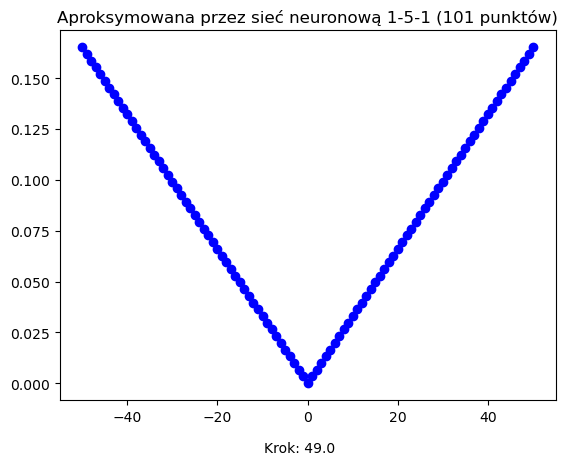

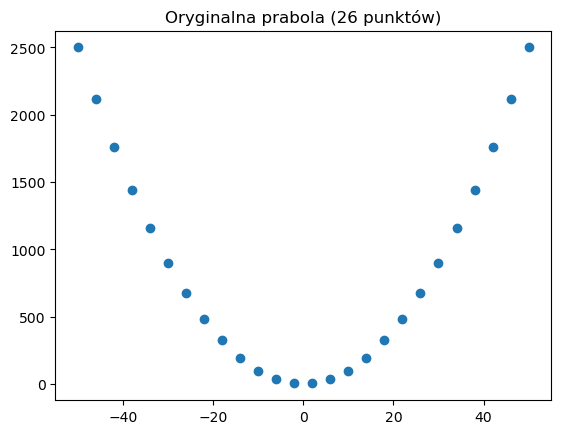

In [22]:
x_org = np.linspace(-50,50,26)
y_org = x_org**2

x1=np.linspace(-50,50,101)
y1=x1**2

x1 = x1.reshape(1, -1)
x1 = x1.T
y1 = y1.reshape(1, -1)
y1 = y1.T


eta = 1 * 10**(-6)
epochs = 5000
nn_1_5_1 = NeuralNetwork_1_5_1(x1, y1, 20, eta)
nn_1_5_1.train('relu', 'identity', epochs)

plt.title("Oryginalna prabola (26 punktów)")
plt.scatter(x_org,y_org)
plt.show()


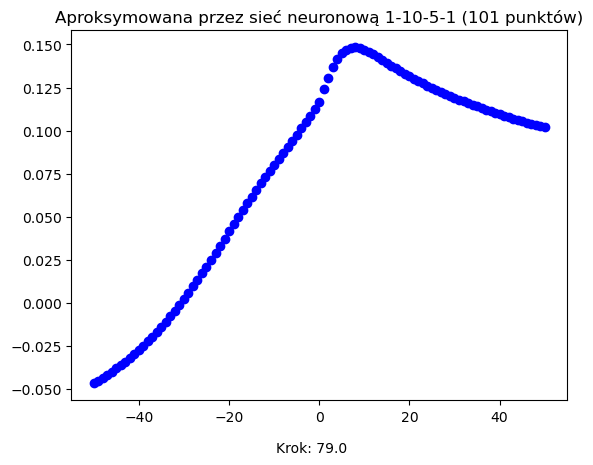

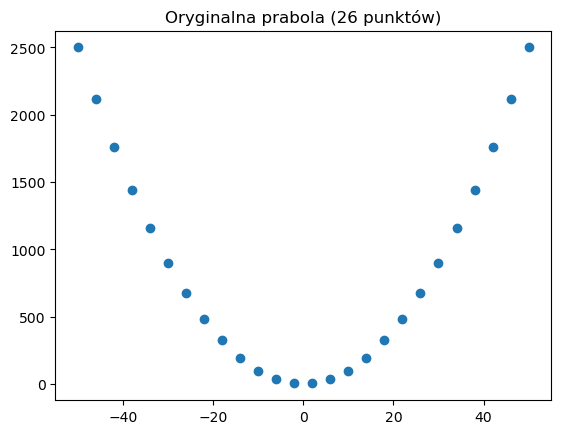

In [35]:
x_org = np.linspace(-50,50,26)
y_org = x_org**2

x1=np.linspace(-50,50,101)
y1=x1**2

x1 = x1.reshape(1, -1)
x1 = x1.T
y1 = y1.reshape(1, -1)
y1 = y1.T

eta = 1 * 10**(-6)
epochs = 8000
nn_1_10_5_1 = NeuralNetwork_1_10_5_1(x1, y1, 20, eta)
nn_1_10_5_1.train('relu', 'sigmoid', 'identity', epochs)
plt.title("Oryginalna prabola (26 punktów)")
plt.scatter(x_org,y_org)
plt.show()


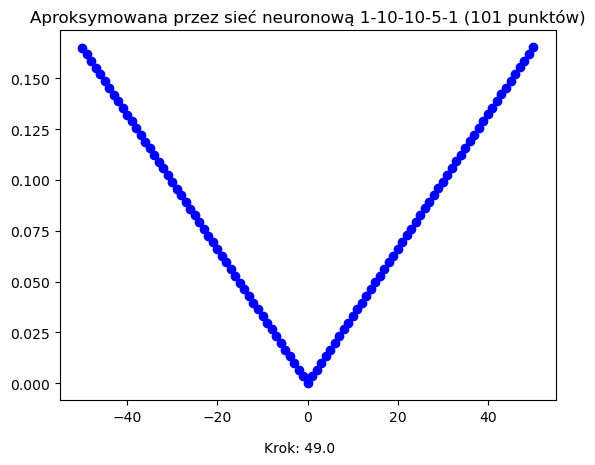

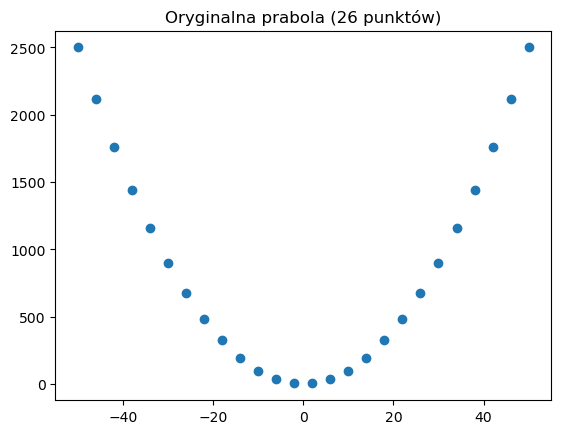

In [25]:
x_org = np.linspace(-50,50,26)
y_org = x_org**2

x1=np.linspace(-50,50,101)
x1 = np.c_[x1, np.ones(x1.shape[0])]
y1=x1**2

x1 = x1.reshape(1, -1)
x1 = x1.T
y1 = y1.reshape(1, -1)
y1 = y1.T


eta = 1 * 10**(-6)
epochs = 5000

nn_1_10_10_5_1 = NeuralNetwork_1_10_10_5_1(x1, y1, 20, eta)
nn_1_10_10_5_1.train('relu','relu', 'relu', 'identity', epochs)

plt.title("Oryginalna prabola (26 punktów)")
plt.scatter(x_org,y_org)
plt.show()

# Funkcja Sinus

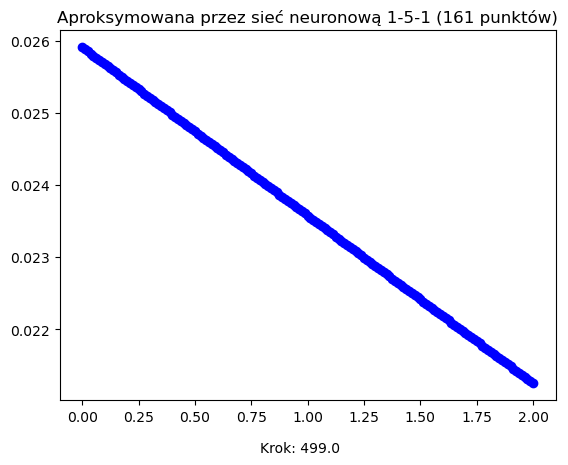

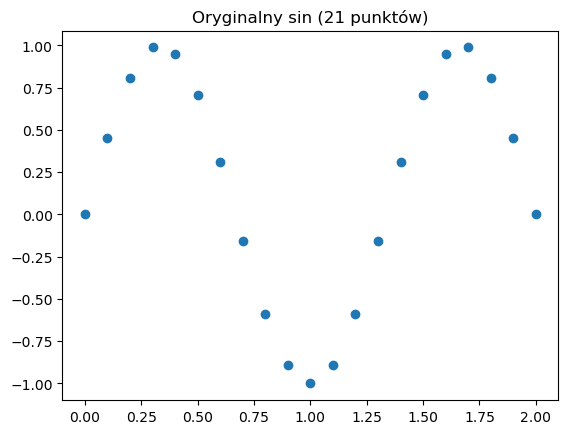

In [31]:
x_org = np.linspace(0,2,21)
y_org = np.sin((3*np.pi/2) * x_org)

x2=np.linspace(0,2,161)
x1 = np.c_[x1, np.ones(x1.shape[0])]
y2 = np.sin((3*np.pi/2) * x2)

x2 = x2.reshape(1, -1)
x2 = x2.T
y2 = y2.reshape(1, -1)
y2 = y2.T

eta = 1 * 10**(-5)
epochs = 50000
nn_1_5_1 = NeuralNetwork_1_5_1(x2, y2, 345, eta)

nn_1_5_1.train('sigmoid', 'tanh', epochs)

plt.title("Oryginalny sin (21 punktów)")
plt.scatter(x_org,y_org)
plt.show()




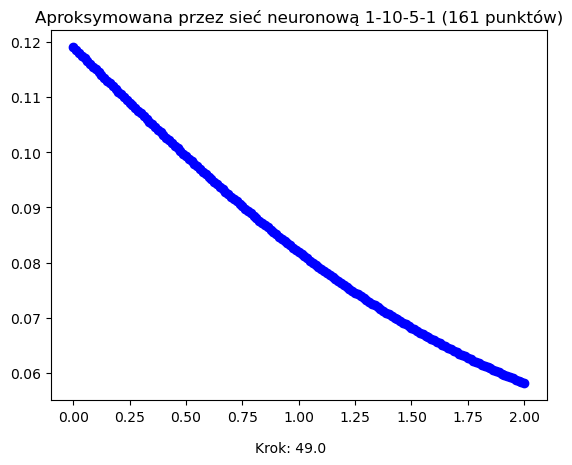

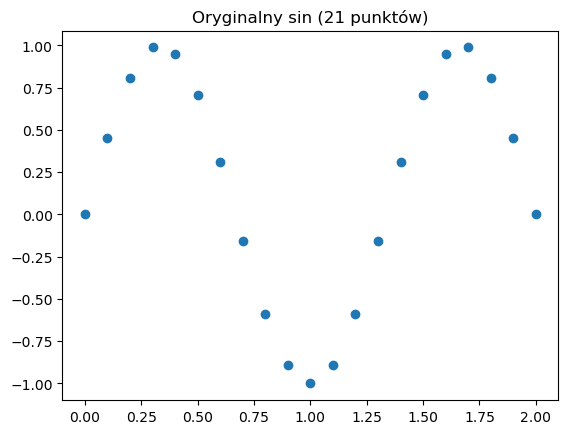

In [8]:
x_org = np.linspace(0,2,21)
y_org = np.sin((3*np.pi/2) * x_org)

x2=np.linspace(0,2,161)
x1 = np.c_[x1, np.ones(x1.shape[0])]
y2 = np.sin((3*np.pi/2) * x2)

x2 = x2.reshape(1, -1)
x2 = x2.T
y2 = y2.reshape(1, -1)
y2 = y2.T

eta = 1 * 10**(-6)
epochs = 5000

nn_1_10_5_1 = NeuralNetwork_1_10_5_1(x2, y2, 34, eta)
nn_1_10_5_1.train('tanh', 'sigmoid', 'identity', epochs)
plt.title("Oryginalny sin (21 punktów)")
plt.scatter(x_org,y_org)
plt.show()

In [36]:
x_org = np.linspace(0,2,21)
y_org = np.sin((3*np.pi/2) * x_org)

x2=np.linspace(0,2,161)
x1 = np.c_[x1, np.ones(x1.shape[0])]
y2 = np.sin((3*np.pi/2) * x2)

x2 = x2.reshape(1, -1)
x2 = x2.T
y2 = y2.reshape(1, -1)
y2 = y2.T

eta = 1 * 10**(-5)
epochs = 500000

nn_1_10_10_5_1 = NeuralNetwork_1_10_10_5_1(x2, y2, 34, eta)
nn_1_10_10_5_1.train('tanh', 'sigmoid', 'tanh', 'identity', epochs)
plt.title("Oryginalny sin (21 punktów)")
plt.scatter(x_org,y_org)
plt.show()

KeyboardInterrupt: 